# Imports : 

In [1]:
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import seaborn as sns
import matplotlib.pyplot as plt

# All files Names : 

In [2]:
#Internet dataset
mypath = r"csv_files/csv_data_amplitude/"
#Command dataset
#mypath = r"pcap_files/"
filenames = [f.split(".")[0] for f in listdir(mypath) if isfile(join(mypath, f))]

#train_files = filenames[:63]
#test_files = filenames[63:]
train_files = filenames[:300]
test_files = filenames[300:]


# Normalization data :

In [3]:
def norm_data_frame(path,filenames):
    df = pd.DataFrame(columns=list(range(0,256))) # empty dataframe
    
    for name in filenames:
        file = pd.read_csv(path + name + ".csv")
        file = pd.DataFrame(StandardScaler().ﬁt_transform(file))
        df = pd.concat([df,file],axis=0)
        
    return df

# DataFrame for PCA

In [11]:
#Internet dataset
amplitudes = norm_data_frame(r"csv_files/csv_data_amplitude/",train_files)
#Command dataset
#amplitudes = norm_data_frame(r"csv_files/csv_amplitude/",train_files)

# PCA Fit :

In [5]:
pca_amplitude = PCA(0.80)

training_amplitudes = amplitudes
pca_amplitude.fit(training_amplitudes.values)

print(sum(pca_amplitude.explained_variance_ratio_))
print(pca_amplitude.explained_variance_ratio_)


0.8133802888439677
[0.69490628 0.07606875 0.02821219 0.01419308]


# Transform Train Files After PCA :

In [6]:
for name in test_files:
    #Command dataset
    #df = pd.read_csv(fr'csv_files/csv_amplitude/{name}.csv')
    #Internet dataset
    df = pd.read_csv(fr'csv_files/csv_data_amplitude/{name}.csv')
    df = pd.DataFrame(StandardScaler().ﬁt_transform(df))
    df = pd.DataFrame(pca_amplitude.transform(df.values))
    #Command dataset
    #df.to_csv(path_or_buf=fr"pca/pca_csv _train/{name}.csv",index=False)
    #Internet dataset
    df.to_csv(path_or_buf=fr"pca/pca_data_csv_train/{name}.csv",index=False)

# Transform Every Amplitude File After PCA :

In [7]:
for name in train_files:
    #Command dataset
    #df = pd.read_csv(fr'csv_files/csv_amplitude/{name}.csv')
    #Internet dataset
    df = pd.read_csv(fr'csv_files/csv_data_amplitude/{name}.csv')
    df = pd.DataFrame(StandardScaler().ﬁt_transform(df))
    df = pd.DataFrame(pca_amplitude.transform(df.values))
    #Command dataset
    #df.to_csv(path_or_buf=fr"pca/pca_csv_test/{name}.csv",index=False)
    #Internet dataset
    df.to_csv(path_or_buf=fr"pca/pca_data_csv_test/{name}.csv",index=False)

# PCA Graphs :

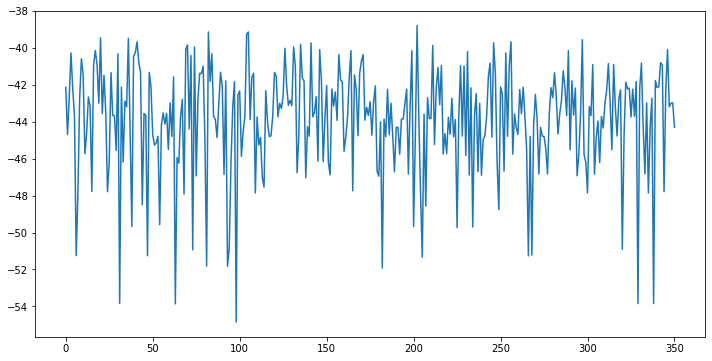

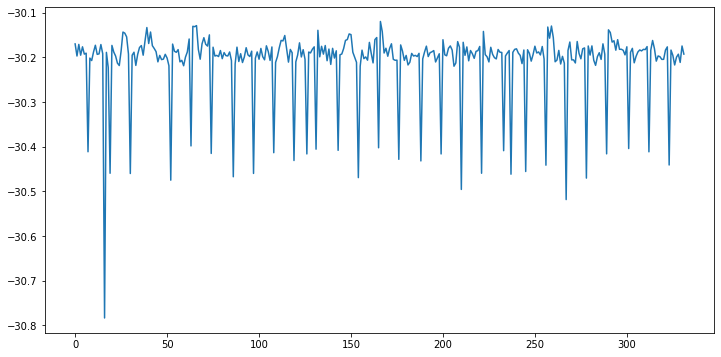

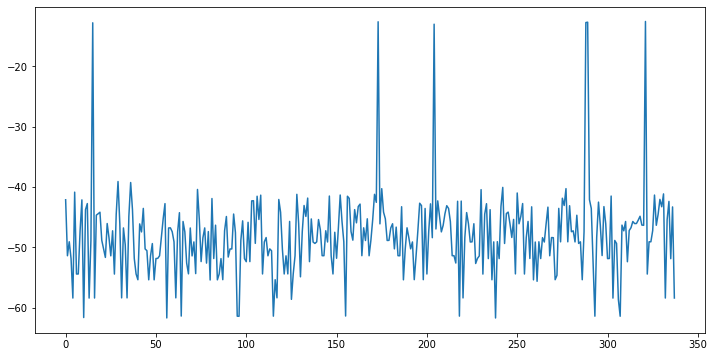

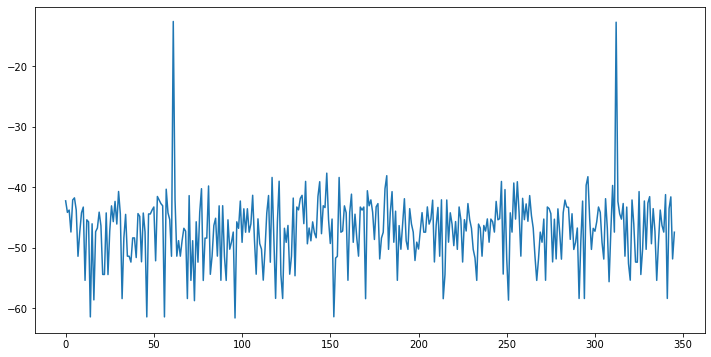

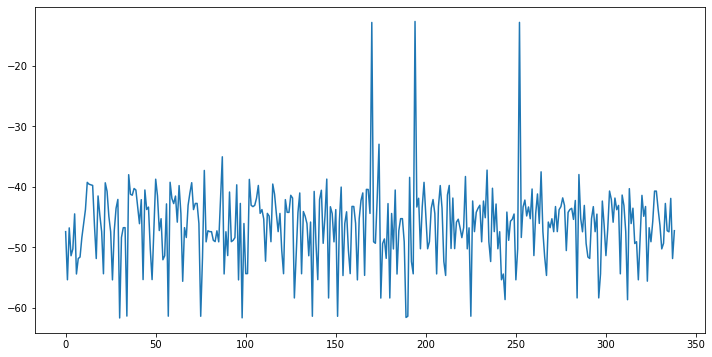

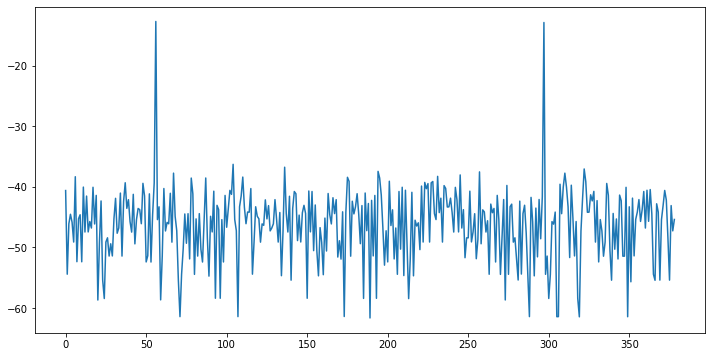

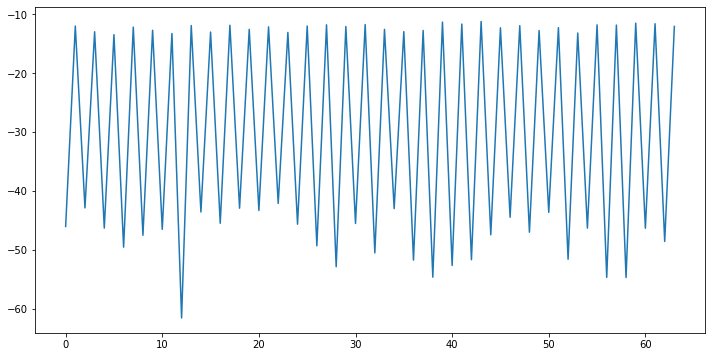

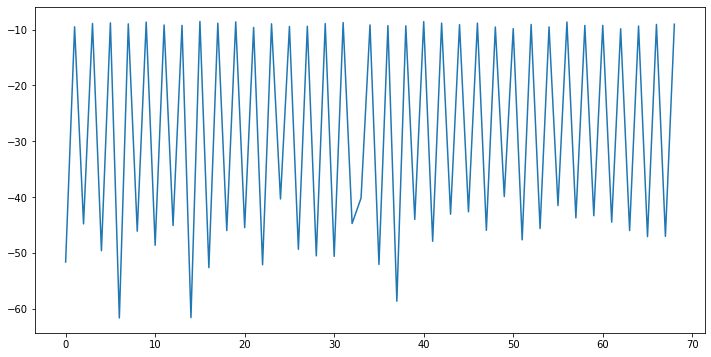

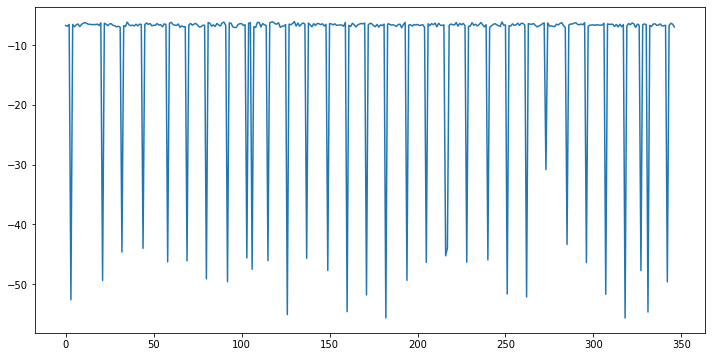

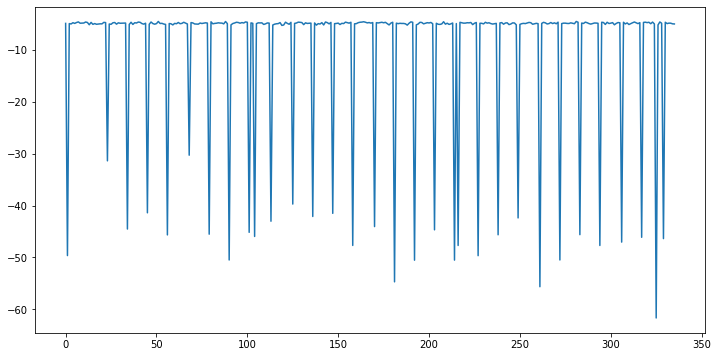

In [8]:
for i,name in enumerate(test_files[:10]):
    df = pd.read_csv(fr'csv_files/csv_data_amplitude/{name}.csv')
    df[f'{i}'].plot.line(figsize=(12, 6), subplots=True, legend=False)
    plt.show()

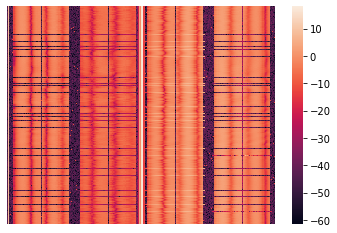

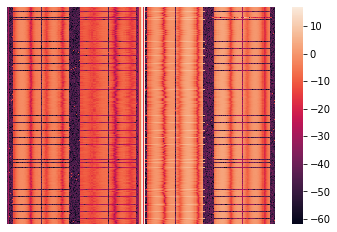

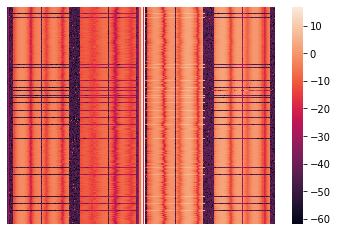

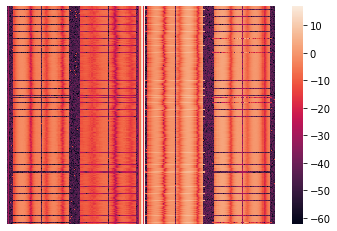

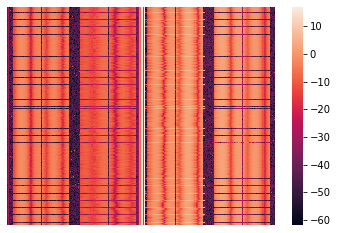

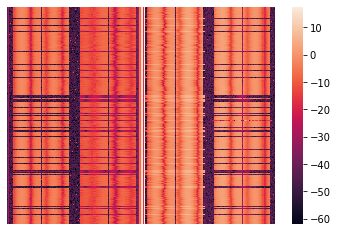

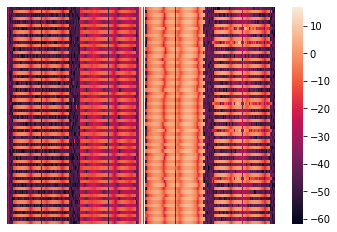

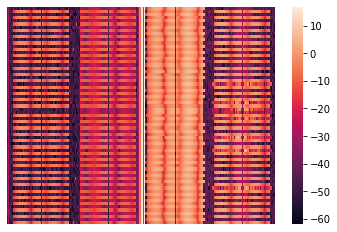

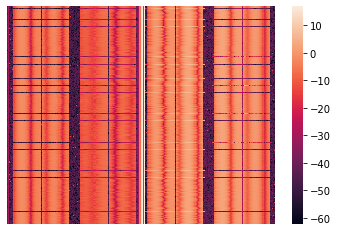

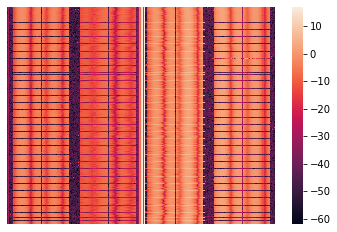

In [9]:
for i,name in enumerate(test_files[:10]):
    df = pd.read_csv(fr'csv_files/csv_data_amplitude/{name}.csv')
    sns.heatmap(df,xticklabels=False, yticklabels=False)
    plt.show()

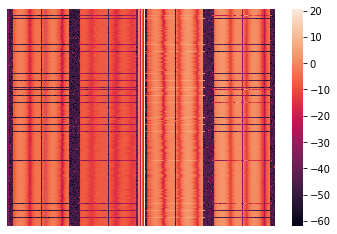

In [10]:
df = pd.read_csv(fr'csv_files/csv_data_amplitude/nothing50.csv')
sns.heatmap(df,xticklabels=False, yticklabels=False)
plt.show()